In [93]:
#Homework 2 Elí Martínez Guerra
#Q1:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import matplotlib as mplot

## generate the data and plot it for an ideal normal curve
  
## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)
  
## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 0, 1)

def Gauss(x,mean,std):
    return np.exp(-(x-mean)**2/(2*std**2))/(std*((2*np.pi)**0.5))

In [94]:
popt, pcov = curve_fit(Gauss, x_data, y_data)
print("The Mean is",popt[0], "and the Standard Deviation is",popt[1])

The Mean is -2.2673850549679947e-09 and the Standard Deviation is 0.9999999999953786


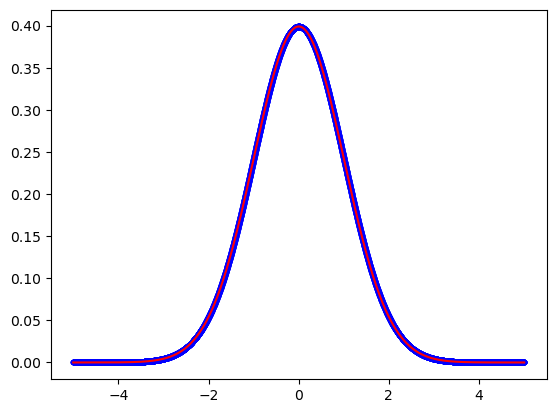

In [95]:
plt.plot(x_data, y_data, '.b')
plt.plot(x_data, Gauss(x_data,*popt),'-r')

(array([1., 3., 6., 9., 7., 7., 7., 4., 4., 2.]),
 array([-0.44736343,  6.18902957, 12.82542256, 19.46181556, 26.09820855,
        32.73460155, 39.37099454, 46.00738754, 52.64378053, 59.28017353,
        65.91656652]),
 <BarContainer object of 10 artists>)

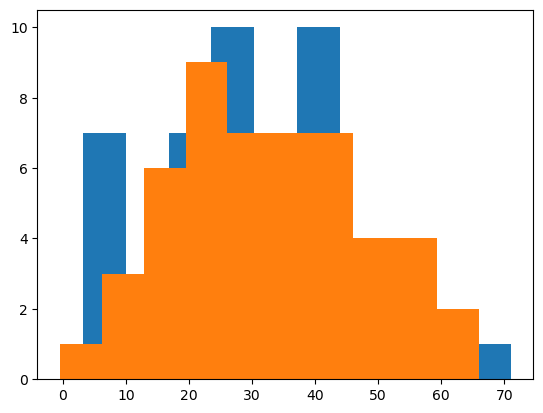

In [96]:
f1 = np.random.normal(30,16,50)
f2 = np.random.normal(33,18,50)
plt.hist(f1, label='f1')
plt.hist(f2, label='f2')

In [97]:
#Q2:
import pandas as pd
import seaborn as sns
def skew(x):
    mu=np.mean(x)
    med=np.median(x)
    std=np.var(x)**0.5
    return 3*(mu-med)/std
data_r = pd.read_csv('/Users/elimg/OneDrive/Documentos/UoUtah/Classes/Spring B 2023/Adv Topics/HW/HW2/winequality-red.csv',sep=';')
fa_r = data_r.loc[:,'fixed acidity']
print('The fixed acidity skewness in red wine is ',skew(fa_r))

The fixed acidity skewness in red wine is  0.7232831679055743


In [98]:
def third(x):
    i=0
    ss=0
    mu=np.mean(x)
    while i<len(x):
        a=(x[i]-mu)**3
        ss=+a
        i=i+1
    return ss/(np.var(x)**(3/2))
print('The fixed acidity third moment in red wine is ',third(fa_r))

The fixed acidity third moment in red wine is  -2.367006102896721


In [99]:
#Q3:
print('H0: m1-m2=0')
print('Ha: m1-m2!=0')
data_w = pd.read_csv('/Users/elimg/OneDrive/Documentos/UoUtah/Classes/Spring B 2023/Adv Topics/HW/HW2/winequality-white.csv',sep=';')
fa_w = data_w.loc[:,'fixed acidity']
#print(np.mean(fa_w))
#print(np.mean(fa_r))
#print(np.var(fa_w)**0.5)
#print(np.var(fa_r)**0.5)
print(sp.stats.ttest_ind(fa_w,fa_r),' t-value for two tails at a=0.05 is 2.241')
print('|t-value|>t-value crit. H0 is rejected and therefore is concluded with 95% of confidence that the means of fixed acidity of red and white wines are different')


H0: m1-m2=0
Ha: m1-m2!=0
Ttest_indResult(statistic=-44.90556823034863, pvalue=0.0)  t-value for two tails at a=0.05 is 2.241
|t-value|>t-value crit. H0 is rejected and therefore is concluded with 95% of confidence that the means of fixed acidity of red and white wines are different


Histogram for fixed acidity of red wine
Histogram for fixed acidity of white wine


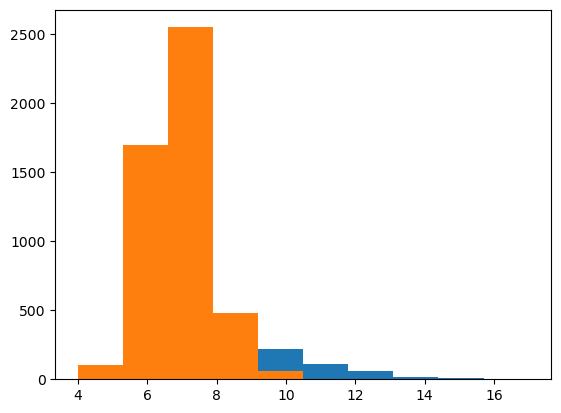

In [100]:
plt.hist(fa_r, range=(4,17))
print('Histogram for fixed acidity of red wine')
plt.hist(fa_w, range= (4,17))
print('Histogram for fixed acidity of white wine')

In [101]:
print('The Wasserstein distance is ',sp.stats.wasserstein_distance(fa_w,fa_r))

The Wasserstein distance is  1.4648496048597135


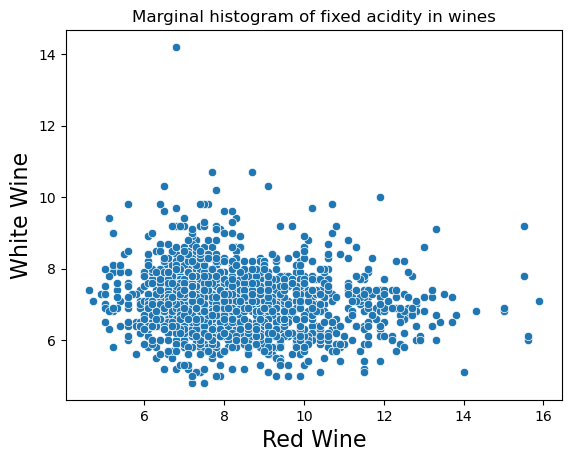

In [102]:
df = pd.DataFrame({
    'X': fa_r,
    'Y': fa_w,})
df.head(n=3)
sns.scatterplot(x="X",y="Y",data=df)
plt.xlabel("Red Wine",size=16)
plt.ylabel("White Wine",size=16)
plt.title("Marginal histogram of fixed acidity in wines")
plt.savefig("Marginal_scatter.jpg",dpi=150)

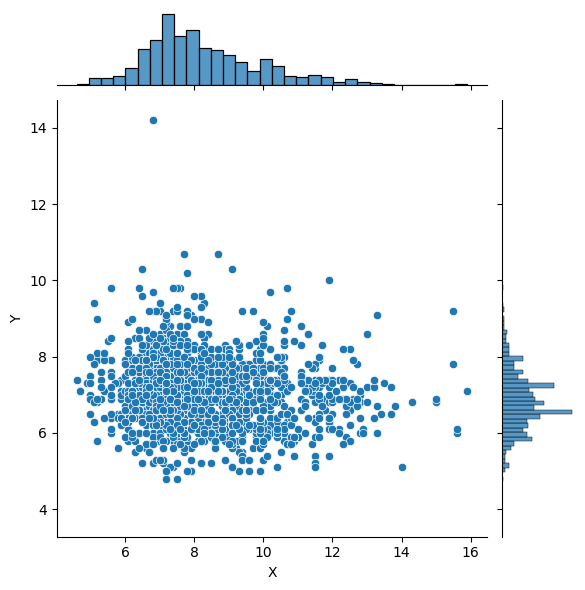

In [103]:
sns.jointplot(x="X",
             y="Y",
             edgecolor="white",
             data=df);
plt.savefig("Marginal_plot_wine",dpi=150)